### Содержание: 
[1. Изучение данных](#1)

# Исследование объявлений о продаже квартир

  В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

  По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b> Цель исследования:</b>

    - определить рыночную стоимость объектов недвижимости
    - узнать какие факторы влияют на ценообразование
    - определить типичные параметры квартир
    
<b> Ход исследования:</b>

    - обзор данных
    - предобработка данных
    - добавление в таблицу вспомогательных параметров
    - иссделовательский анализ
    - общие выводы


 <b>Описание данных:</b>
 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении\

<a id='1'></a> <H3>Открываем файл с данными и изучаем общую информацию.  

In [2]:

#импортируем библиотеки

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    

In [3]:

print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


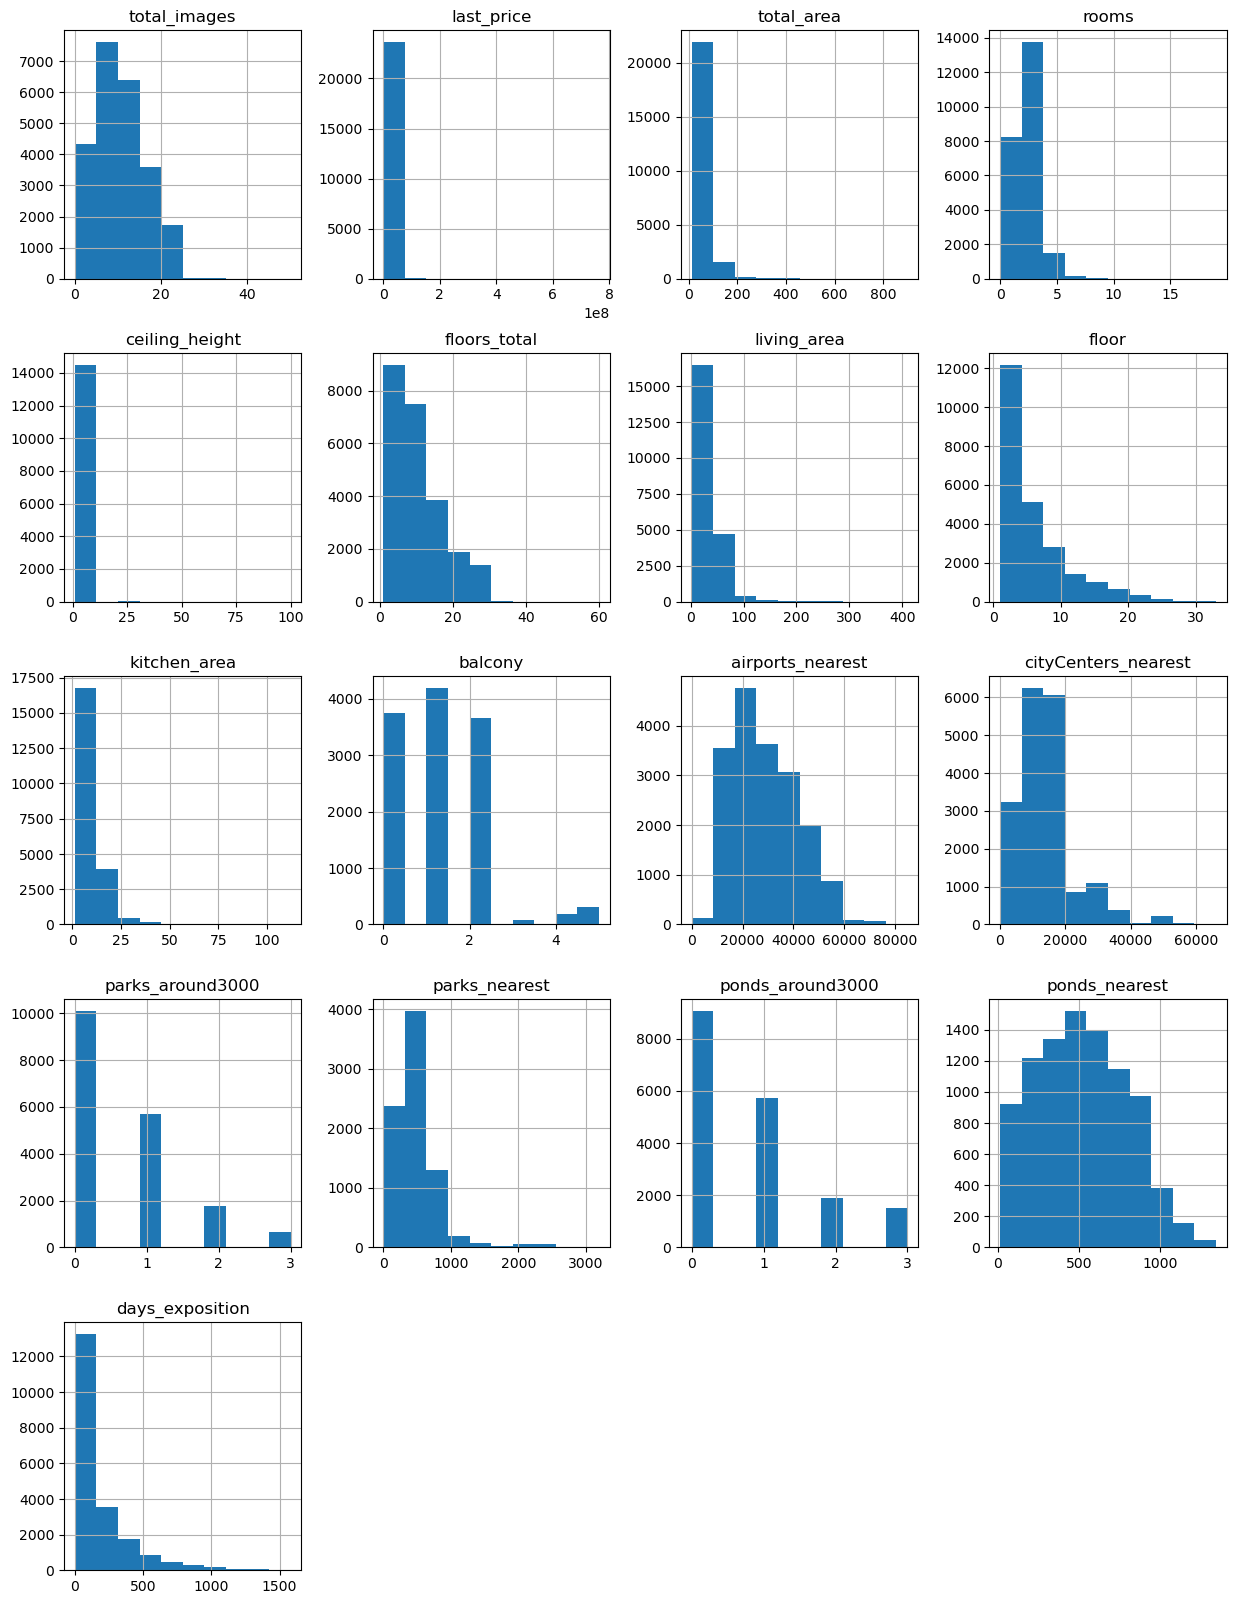

In [6]:
#строим гистограммы для всех числовых столбцов датасета

data.hist(figsize=(15, 20))
plt.show() 

Обнаружены пропуски в столбцах:  \
 5   ceiling_height        14504 non-null  float64  - заполнить медианой \
 6   floors_total          23613 non-null  float64 - пропусков мало, удалить строки с пропусками \
 7   living_area           21796 non-null  float64 - медиана по количеству комнат \
 9   is_apartment          2775  non-null   object    - если пропуск - то False \
 12  kitchen_area          21421 non-null  float64 - заполнить нулями тк не возможности узнать верные данные \
 13  balcony               12180 - если есть пропуски, определяем их как 0, те балкона нет \
 14  locality_name         23650 non-null  object заменить е и ё =\
 15  airports_nearest      18157 non-null  float64 нет возможности корректно заполнить пропуски \
 16  cityCenters_nearest   18180 - нет возможности корректно заполнить пропуски \
 17  parks_around3000      18181 non-null  float64  нет возможности корректно заполнить пропуски \
 18  parks_nearest         8079  non-null   float64  нет возможности корректно заполнить пропуски \
 19  ponds_around3000      18181 non-null  float64  нет возможности корректно заполнить пропуски \
 20  ponds_nearest         9110 - для анализа не требуется заполнять пропуски\
 21  days_exposition       20518 - посчитать пропуски по годам, если объявление не имеет даты закрытия, возможно оно еще актуально

## Предобработка данных

Оценим количество пропусков

In [4]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Оценим количество уникальных значений в столбце высота потолков

In [4]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [9]:
print('Всего квартир с высотой потолков больше 5 метров', data[data['ceiling_height'] > 5]['rooms'].count())

Всего квартир с высотой потолков больше 5 метров 36


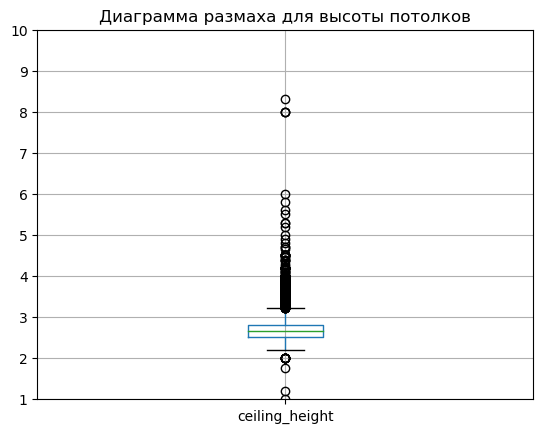

In [11]:
#Построим диаграмму размаха

plt.ylim(1, 10)
data.boxplot('ceiling_height')
plt.title("Диаграмма размаха для высоты потолков") 
plt.show()

In [13]:
# предоложим, что все квартиры с высотой потолков более 9 метров - это ошибка в записи данных 
#и нужно было поставить запятую для отделения десятичной части.

for i in data['ceiling_height']:
        if i >= 9:
            data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})
#пропуски заполним медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print('Количество пропусков', data['ceiling_height'].isna().sum())
data = data.sort_values(by='ceiling_height')
data_clean = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 5)]

print('Данных до очистки от выбросов', data['ceiling_height'].count())
print('Данных после очистки от выбросов', data_clean['ceiling_height'].count())

Количество пропусков 0
Данных до очистки от выбросов 23699
Данных после очистки от выбросов 23669


В столбце ['ceiling_height'] были обнаружены аномально большие значения - 27, 32, предположительно это ошибки при заполении, такие значения были заменены на 2,7 и 3,2. 
Аномально маленькие значения - ниже 2 метров, были удалены, аномально больше - выше 5 были удалены - таких было 11, такие значения сильно искажают картину, а их количество не велико
Были обнаружены пропуски, которые были заполнены медианным значением

In [14]:
#Проверим колчество пропусков в столбце floors_total и если их меньше 5% - удалим пропуски
print(data['floors_total'].isna().sum())
data_clean.dropna(subset = ['floors_total'], inplace = True) 
print(data_clean['floors_total'].isna().sum())


86
0


Строки с поропусками в столбце общее количество этажей были удалены

In [15]:
#Проверим количество пропусков в столбце livig area
print(data_clean['living_area'].isna().sum())

1865


In [16]:
# т.к. пропусков значительное количество и данные однородные - заполним пропуски медианным значением
for room in data_clean['rooms'].unique():
    data_clean.loc[(data_clean['rooms'] == room) & (data_clean['living_area'].isna()), 'living_area'] = \
    data_clean.loc[(data_clean['rooms'] == room), 'living_area'].median()

print(data_clean['living_area'].isna().sum())


0


Пропуски в столбце 'living_area' были заполнены медианным значением по количеству комнат.


In [17]:
#Проверим пропуски в столбце is_appatrment
print(data['is_apartment'].unique())
data_clean['is_apartment'] = data_clean['is_apartment'].fillna(False)
print(data_clean['is_apartment'].unique())


[nan True False]
[False  True]


Пропуски в столбце is_appartment были заполнены False т.к. скорее всего если люди пропускали этот пункт, значит это не аппаратменты

In [30]:
data[data['balcony'].isna()]
data_clean['balcony'] = data_clean['balcony'].fillna(0)
data_clean['balcony'].unique()


array([0., 1., 2., 5., 4., 3.])

Пропуске в столбце balcony были заменены на False т.к. если стоит пропуск то скорее всего балкона нет

In [18]:
#Приведем названия к большей однородности
data_clean['locality_name'] = data_clean['locality_name'].str.replace('ё','е', regex=True)
data_clean['locality_name'] = data_clean['locality_name'].str.replace('поселок городского типа','поселок', regex=True)
data_clean = data_clean.sort_values(by='locality_name')
names = list(data_clean['locality_name'].unique())
data_clean.duplicated().sum()


0

Для большей однородности слова "поселок", "посёлок" и "поселок городского типа" были приведены к именованию "поселок"


In [19]:
data_clean['cityCenters_nearest'] = data_clean['cityCenters_nearest'].fillna(0)
data_clean['kitchen_area'] = data_clean['kitchen_area'].fillna(0)
data_clean['airports_nearest'] = data_clean['airports_nearest'].fillna(0)
data_clean['parks_around3000'] = data_clean['parks_around3000'].fillna(0)
data_clean['ponds_around3000'] = data_clean['ponds_around3000'].fillna(0)
data_clean['parks_nearest'] = data_clean['parks_nearest'].fillna(0)
data_clean['ponds_nearest'] = data_clean['ponds_nearest'].fillna(0)

data_clean.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11464
locality_name              48
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3166
dtype: int64

Пропуски в столбцах "Расстояние до центра", "площадь кухни", "ближайший аэропорт", "ближайший парк" были заполнены нулями.
Если площадь кухни запоненить медианой, можно исказить данные, напрмер, для квартир-студий

Проверка на явные дубликаты

In [13]:
data_clean.duplicated().sum()

0

Добавим для удобства стоблец с ценами в млн руб

In [20]:
data_clean['last_price'].describe()
data_clean['last_price_mln'] = data_clean['last_price']/1000000
data_clean

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln
8767,6,650000.00,45.00,2017-06-24T00:00:00,2,2.65,5.00,30.00,1,False,False,False,6.00,0.00,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,68.00,0.65
3010,6,850000.00,48.00,2016-03-11T00:00:00,2,2.65,5.00,30.50,5,False,False,False,0.00,0.00,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,174.00,0.85
17075,7,660000.00,43.00,2018-10-23T00:00:00,2,2.65,3.00,29.00,3,False,False,False,6.00,NaN,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.66
18807,12,1500000.00,78.00,2017-09-07T00:00:00,3,2.80,4.00,45.00,3,False,False,False,0.00,1.00,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,45.00,1.50
5821,7,820000.00,51.00,2017-12-09T00:00:00,2,2.65,5.00,32.00,5,False,False,False,8.50,NaN,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,130.00,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16610,11,11940000.00,112.00,2015-11-19T00:00:00,3,3.00,5.00,64.00,2,False,False,False,23.00,0.00,NaN,21219.00,1322.00,1.00,740.00,3.00,365.00,319.00,11.94
19045,6,4650000.00,48.00,2016-01-25T00:00:00,2,3.12,5.00,26.20,1,False,False,False,8.00,0.00,NaN,21654.00,3312.00,1.00,549.00,1.00,858.00,254.00,4.65
18526,3,10800000.00,86.00,2016-06-24T00:00:00,4,3.20,7.00,48.00,2,False,False,False,12.00,0.00,NaN,11206.00,8943.00,0.00,0.00,0.00,0.00,65.00,10.80
1097,3,8600000.00,81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,False,False,False,8.80,0.00,NaN,23478.00,4258.00,0.00,0.00,0.00,0.00,147.00,8.60


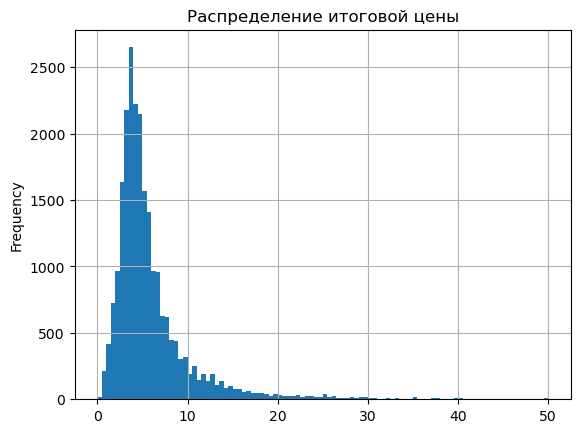

In [22]:

data_clean['last_price_mln'].plot(kind='hist',bins=100, range=(0,50), title='Распределение итоговой цены', grid=True)
plt.show() 

квартиры дороже 20 млн довольно редко встречаются

In [23]:
#Посчитаем количетсво и среднюю стоимость квартир с разным количеством комнат
room_price=data_clean.pivot_table(index='rooms', values='last_price_mln', aggfunc=['count', 'median'])
room_price

,count,median
,last_price_mln,last_price_mln
rooms,,
0,193,2.70
1,8002,3.60
2,7907,4.77
3,5789,6.20
4,1176,9.00
5,323,14.00
6,103,19.00
7,59,24.90


сделав сводную таблицу видно, что квартиры с числом комнат больше 8 являются скорее аномалиями по цене и по количеству комнат 

In [26]:
data_clean = data_clean[(data_clean['last_price_mln'] < 20)&(data_clean['rooms'] < 8)]

отсеим аномально высокие цены, те что больше 20 млн и всесте с ними аномальное количество комнат

In [32]:
#приведем столбцы floors_total и balcony к int 
data_clean['floors_total'] = data_clean['floors_total'].astype('int')
data_clean['balcony'] = data_clean['balcony'].astype('int')

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22858 entries, 3010 to 4189
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22858 non-null  int64  
 1   last_price            22858 non-null  float64
 2   total_area            22858 non-null  float64
 3   first_day_exposition  22858 non-null  object 
 4   rooms                 22858 non-null  int64  
 5   ceiling_height        22858 non-null  float64
 6   floors_total          22858 non-null  int32  
 7   living_area           22858 non-null  float64
 8   floor                 22858 non-null  int64  
 9   is_apartment          22858 non-null  bool   
 10  studio                22858 non-null  bool   
 11  open_plan             22858 non-null  bool   
 12  kitchen_area          22858 non-null  float64
 13  balcony               22858 non-null  int32  
 14  locality_name         22858 non-null  object 
 15  airports_nearest 

* Вывод: \
В столбце высота потолков пропуски были заполнены медианой, аномальные значения (до 2 и больше 5) отброшены \
Строки с поропусками в столбце общее количество этажей были удалены \
Пропуски в столбце жилая площадь были заполнены медианным значением по количеству комнат. \
Пропуски в столбце с балконами - нулями \
В столбце с названием населенного пункта "поселок", "посёлок" и "поселок городского типа" были приведены к именованию "поселок \
Пропуски в столбцах "Расстояние до центра", "площадь кухни", "ближайший аэропорт", "ближайший парк" были заполнены нулями. \
Были отсеяны квартиры дороже 20 млн как аномалии \
Дубликатов обнаружено не было \
Данные готовы для дальнейшего анализа

## Добавление вспомогательных параметров

In [34]:
data_clean['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data_clean['year_exposition'] = data_clean['first_day_exposition'].dt.year
exposition = data_clean[data_clean['days_exposition'].isna()]
exposition.groupby('year_exposition')['total_images'].count()


year_exposition
2014      12
2015      55
2016      56
2017     243
2018     882
2019    1714
Name: total_images, dtype: int64

В таблицу добавлен столбец "год подачи объяаление". Выведена таблца, которая показывает что с увеличением года количество объявлений без даты снятия увеличиваются. Вывод - объявления актуальны на момент сбора данных.

In [35]:
#добавляю столбец с месяцем экспозиции
data_clean['month_exposition'] = data_clean['first_day_exposition'].dt.month

#добавляю столбец с днем недели
data_clean['week_exposition'] = data_clean['first_day_exposition'].dt.weekday

#добавляю столбец с ценой квадратного метра
data_clean['square_meter_price'] = data_clean['last_price'] / data_clean['total_area']

#добавляю столец с типом этажа

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

data_clean['floor_type'] = data_clean.apply(floor_type, axis=1)

#добавляю столбец с расстоянием до центра в километрах
data_clean['cityCenters_nearest_km'] = (data_clean['cityCenters_nearest']/1000).round(0).astype(int)
data_clean


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,year_exposition,month_exposition,week_exposition,square_meter_price,floor_type,cityCenters_nearest_km
8767,6,650000.00,45.00,2017-06-24,2,2.65,5,30.00,1,False,False,False,6.00,0,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,68.00,0.65,2017,6,5,14444.44,первый,0
3010,6,850000.00,48.00,2016-03-11,2,2.65,5,30.50,5,False,False,False,0.00,0,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,174.00,0.85,2016,3,4,17708.33,последний,0
17075,7,660000.00,43.00,2018-10-23,2,2.65,3,29.00,3,False,False,False,6.00,0,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.66,2018,10,1,15348.84,последний,0
18807,12,1500000.00,78.00,2017-09-07,3,2.80,4,45.00,3,False,False,False,0.00,1,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,45.00,1.50,2017,9,3,19230.77,другой,0
5821,7,820000.00,51.00,2017-12-09,2,2.65,5,32.00,5,False,False,False,8.50,0,Бокситогорск,0.00,0.00,0.00,0.00,0.00,0.00,130.00,0.82,2017,12,5,16078.43,последний,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16610,11,11940000.00,112.00,2015-11-19,3,3.00,5,64.00,2,False,False,False,23.00,0,NaN,21219.00,1322.00,1.00,740.00,3.00,365.00,319.00,11.94,2015,11,3,106607.14,другой,1
19045,6,4650000.00,48.00,2016-01-25,2,3.12,5,26.20,1,False,False,False,8.00,0,NaN,21654.00,3312.00,1.00,549.00,1.00,858.00,254.00,4.65,2016,1,0,96875.00,первый,3
18526,3,10800000.00,86.00,2016-06-24,4,3.20,7,48.00,2,False,False,False,12.00,0,NaN,11206.00,8943.00,0.00,0.00,0.00,0.00,65.00,10.80,2016,6,4,125581.40,другой,9
1097,3,8600000.00,81.70,2016-04-15,3,3.55,5,50.80,2,False,False,False,8.80,0,NaN,23478.00,4258.00,0.00,0.00,0.00,0.00,147.00,8.60,2016,4,4,105263.16,другой,4


## Исследовательский анализ данных

### общая площадь

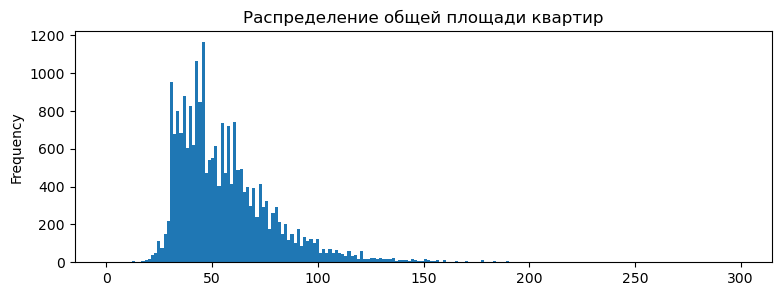

count   22858.00
mean       56.61
std        24.37
min        12.00
25%        40.00
50%        51.00
75%        67.00
max       320.00
Name: total_area, dtype: float64

In [36]:

data_clean['total_area'].plot(kind='hist',bins=200, figsize=(9,3), range=(0, 300), \
                              title='Распределение общей площади квартир')
plt.show() 
data_clean['total_area'].describe()

Квартиры более 200 м считаем аномалиями

In [23]:
data_clean = data_clean[data_clean['total_area'] < 200]
data_clean['total_area'].describe()

count   22822.00
mean       56.35
std        23.42
min        12.00
25%        40.00
50%        51.00
75%        67.00
max       199.20
Name: total_area, dtype: float64

Минимальная  площадь квартиры - 13 м2 \
максимальная - 199 м2.  \
Распределение скошено вправо: среднее 20,83 м2 \
медиана 55,07 м2. 

### жилая площадь

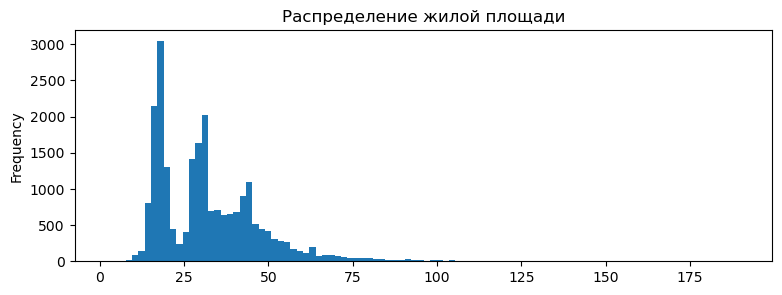

In [37]:
data_clean['living_area'].plot(kind='hist',bins=100, figsize=(9,3), title='Распределение жилой площади')
plt.show()


Уберем наименее частовстречающиеся значения - меньше 10 и больше 80 м2 и пострим новый график

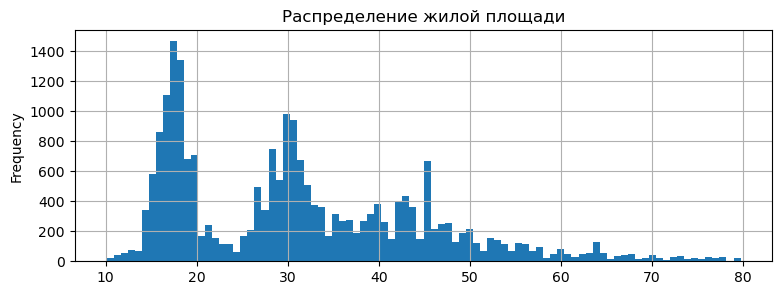

count   22421.00
mean       31.32
std        13.67
min        10.08
25%        18.10
50%        30.00
75%        40.80
max        79.74
Name: living_area, dtype: float64

In [38]:
data_clean = data_clean[(data_clean['living_area'] < 80) & (data_clean['living_area'] > 10)]
data_clean['living_area'].plot(kind='hist',bins=90, figsize=(9,3), title='Распределение жилой площади', grid=True)
plt.show()
data_clean['living_area'].describe()

Минимальная жилая площадь квартиры - 10,08 м2 \
максимальная - 79,74 м2.  \
Распределение имеет пики на 18 м2 - это малогабаритные однокомнатные квартиры, далее пик на 30 - это обычные однокомнтаные или "хрущевские" двушки, далее пики на 2 и 3 комнатные квартиры
медиана 31,31 м2. \


### площадь кухни

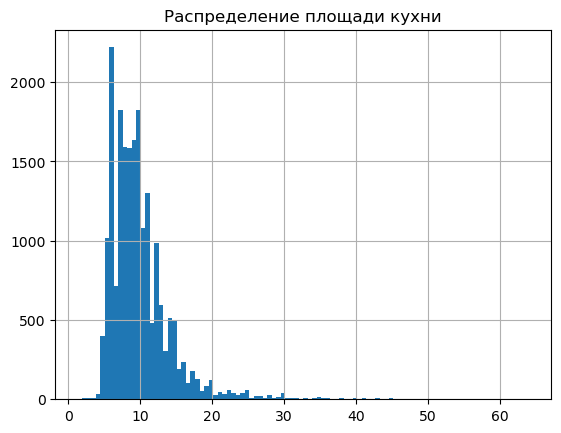

count   20329.00
mean        9.98
std         4.54
min         1.30
25%         7.00
50%         9.00
75%        11.31
max        64.00
Name: kitchen_area, dtype: float64

In [40]:
data_clean.query('kitchen_area !=0')['kitchen_area'].hist(bins=100)
plt.title("Распределение площади кухни") 
plt.show()
data_clean.query('kitchen_area !=0')['kitchen_area'].describe()

Убрала из распределения квартиры без кухонь
Минимальная площадь кухни - 1,3 м2 \
максимальная - 64 м2.  \
Распределение скошено вправо
медиана 9,98 м2. 


### цена объекта

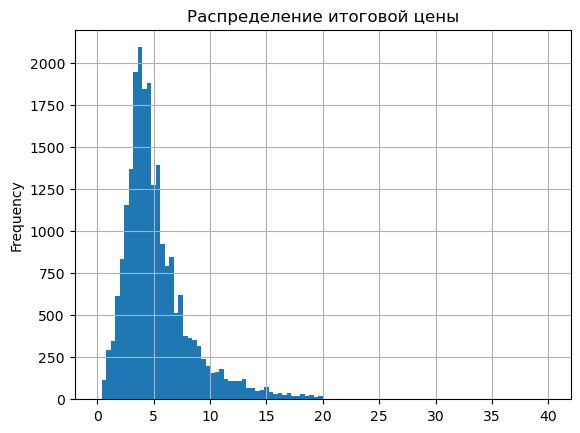

In [44]:

data_clean['last_price_mln'].plot(kind='hist',bins=100, range=(0,40), title='Итоговая цена', grid=True)
plt.title("Распределение итоговой цены") 
plt.show() 


In [28]:
data_clean = data_clean[data_clean['last_price_mln'] > 0.4]
data_clean['last_price_mln'].describe()


count   22417.00
mean        5.27
std         2.99
min         0.43
25%         3.39
50%         4.50
75%         6.32
max        20.00
Name: last_price_mln, dtype: float64

Отсеяла квартиры ниже 400 тыс руб и больше 20 млн, \
Минимальная цена 430 тыс руб \
максимальная 20 млн \
медиана 5, 27 млн \
Распределение близко к нормальному, немного скошено вправо


### количество комнат
    

In [48]:
#посмотрим на среднюю стоимость квартиры в зависимости от количества комнат
print(data_clean.groupby('rooms')['last_price_mln'].mean())



rooms
0    2.97
1    3.80
2    5.32
3    6.87
4    8.22
5    8.43
6    8.94
7   15.35
Name: last_price_mln, dtype: float64


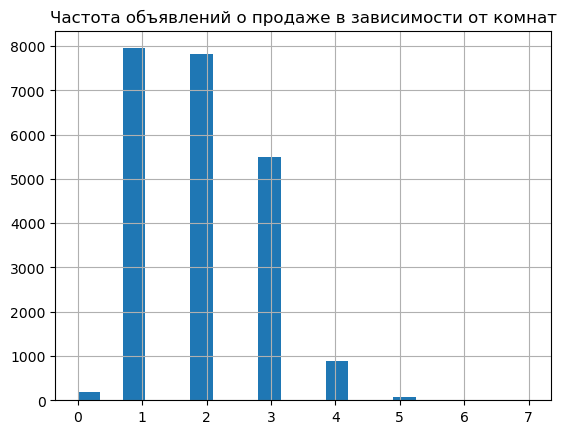

In [47]:
data_clean['rooms'].hist(bins=20)
plt.title("Частота объявлений о продаже в зависимости от комнат") 
plt.show() 

Чем больше комнат в квартире, тем выше стоимость, что ожидаемо.
1 и 2 комнатные квартиры самые популярные, 3 комнтные чуть уступают. 4 и 5 доволно редко встречаются, 6 и 7 практически нет

### высота потолков

In [50]:
print(data_clean['ceiling_height'].describe())

#посчитаем количество и срднюю высоту потолков для квартир с разным количеством комнат
data_clean.pivot_table(index='rooms', values='ceiling_height', aggfunc=['count', 'mean'])


count   22421.00
mean        2.68
std         0.19
min         2.20
25%         2.60
50%         2.65
75%         2.70
max         4.80
Name: ceiling_height, dtype: float64


,count,mean
,ceiling_height,ceiling_height
rooms,,
0,189,2.70
1,7947,2.66
2,7822,2.68
3,5487,2.70
4,885,2.76
5,84,2.86
6,6,2.87
7,1,2.95


Самые высокие потолки в 5-7 комнатных квартирах \
Самые низкие в однокомнатных \
Медианное значение 2,68

### этаж квартиры

In [52]:
print(data_clean['floor'].describe())

count   22421.00
mean        5.91
std         4.91
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64


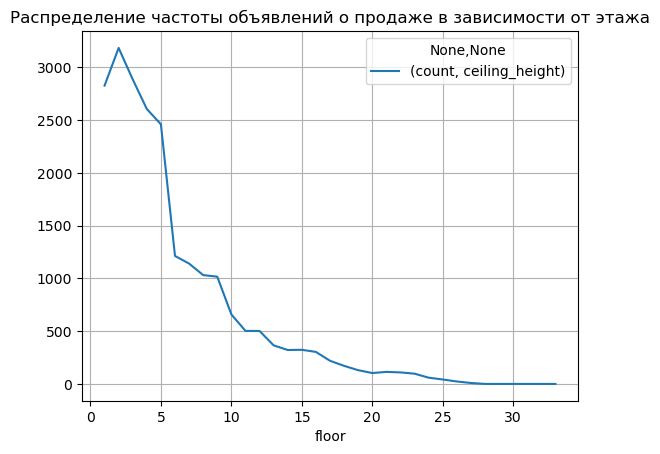

,count
,ceiling_height
floor,
1,2824
2,3181
3,2883
4,2603
5,2458
6,1212
7,1140
8,1031


In [53]:

data_clean.pivot_table(index='floor', values='ceiling_height', aggfunc=['count']).plot(grid=True)
plt.title("Распределение частоты объявлений о продаже в зависимости от этажа") 
plt.show() 
data_clean.pivot_table(index='floor', values='ceiling_height', aggfunc=['count'])

Большинство квартир на 1,2,3 этажах, далее с высотностью кличество объявлений снижается.

### тип этажа квартиры

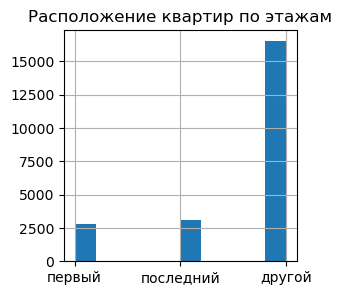

In [54]:
data_clean['floor_type'].hist( figsize=(3,3))
plt.title("Расположение квартир по этажам") 
plt.show() 

Первых и последних этажей примерно одинаково, чаще всего встречается "другой" этаж

### общее количество этажей в доме

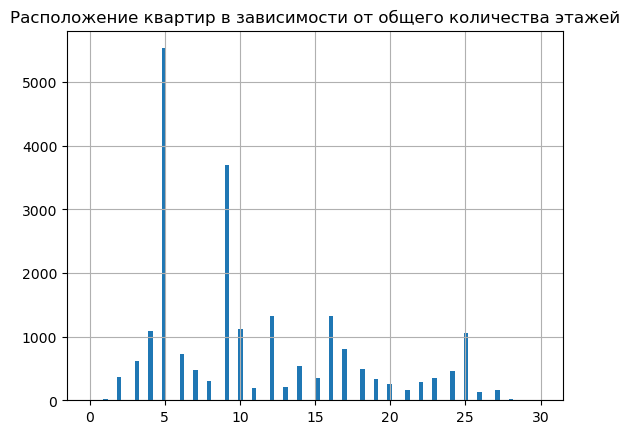

In [55]:

data_clean['floors_total'].hist(bins=100, range=(0,30))
plt.title("Расположение квартир в зависимости от общего количества этажей") 
plt.show() 

Самыми популярными являются пятиэтажки, за ними 9 этажные здания. Далее популярны 12, 16 и 25. Остальные этажности встречаются редко

расстояние до центра города в метрах, переведем в километры для удобства

In [34]:
data_clean['cityCenters_nearest_km'] = data_clean['cityCenters_nearest']/1000

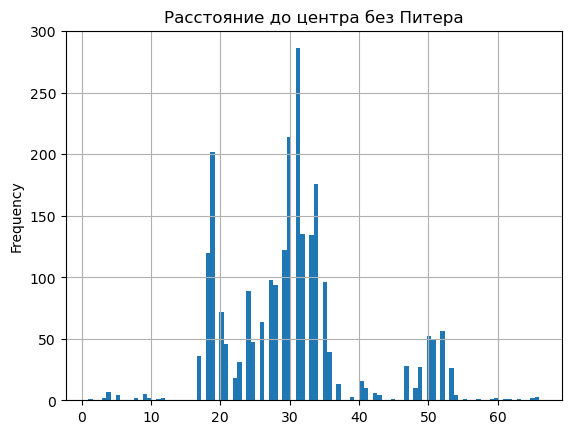

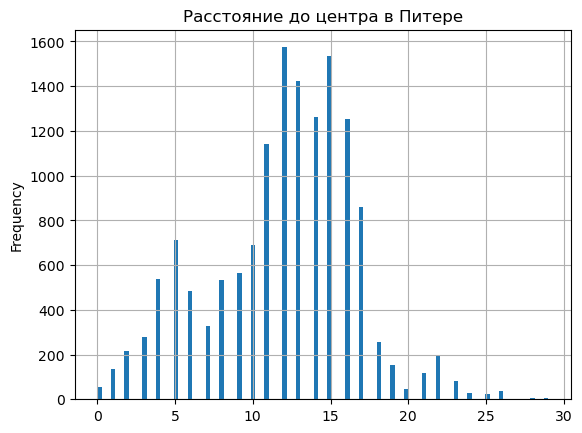

In [60]:
data_clean.query('cityCenters_nearest_km !=0 and locality_name != "Санкт-Петербург"')['cityCenters_nearest_km']\
                .plot(kind='hist',bins=100, title='Расстояние до центра без Питера', grid=True)
                
plt.show()
data_clean.query('cityCenters_nearest_km !=0')['cityCenters_nearest_km'].describe()
data_clean.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km']\
        .plot(kind='hist',bins=100, title='Расстояние до центра в Питере', grid=True)
plt.show()

т.к. в Питере больше всего объявлений нарисовала для него отдельную гистограмму. Выходит довольно странно:большая часть объявлений без Питера находятся в 30 км от центра, конечно, там довольно много деревень, так что это может быть \
но вот в Питере картина не понятная, выходит что большинтво квартир в 15 км от центра, а это ЦКАД и дальше, возможно окраины разстроились и много квартир продается там.

### расстояние до ближайшего аэропорта </b> 

In [62]:
print(data_clean.query('airports_nearest != 0')['airports_nearest'].describe())

count   16950.00
mean    28904.83
std     12854.27
min      6450.00
25%     18309.00
50%     27038.50
75%     37479.00
max     84869.00
Name: airports_nearest, dtype: float64


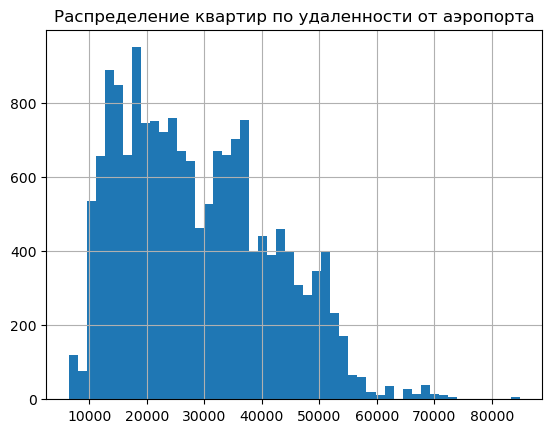

In [63]:

data_clean.query('airports_nearest != 0')['airports_nearest'].hist(bins=50)
plt.title("Распределение квартир по удаленности от аэропорта") 
plt.show()

Основная масса квартир расположена в 10-30 км, что довольно удобно. Далее видим нисходящий тренд - чем дальше квартира тем меньше предложений

### расстояние до ближайшего парка </b> 

In [64]:
print(data_clean.query('parks_nearest != 0')['parks_nearest'].describe())

count   7258.00
mean     495.79
std      342.47
min        1.00
25%      292.00
50%      458.00
75%      617.75
max     3190.00
Name: parks_nearest, dtype: float64


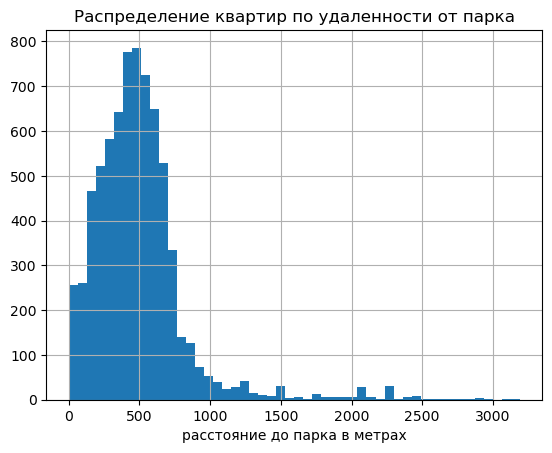

In [66]:

data_clean.query('parks_nearest != 0')['parks_nearest'].hist(bins=50)
plt.title("Распределение квартир по удаленности от парка") 
plt.xlabel("расстояние до парка в метрах") 
plt.show()

Данных по ближайшим паркам только 30%, однако по тем что есть можно сказать, что большинство парков в 15 минутной доступности.
Предполагаю что там где расстояние до парка не указывали - то парки далеко

### день и месяц публикации объявления </b>

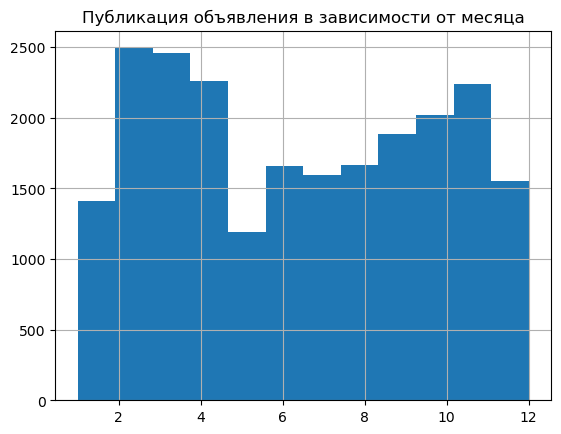

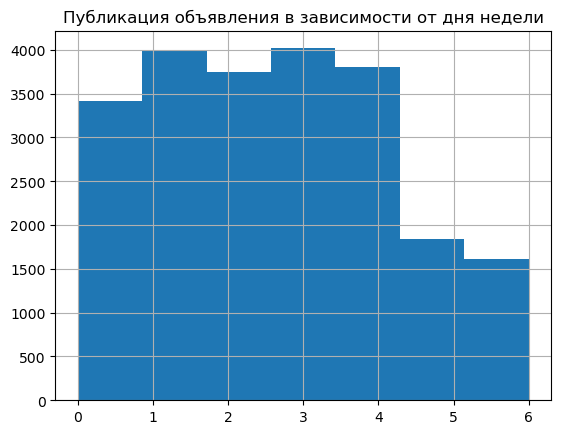

In [68]:
data_clean['month_exposition'].hist(bins=12)
plt.title("Публикация объявления в зависимости от месяца") 
plt.show()
data_clean['week_exposition'].hist(bins=7)
plt.title("Публикация объявления в зависимости от дня недели") 
plt.show()

Больше квартир выставляется на продажу февраль-апрель, затем в дачные период объявлений появляется меньше. Далее идет плавный рост до ноября, потом новогодний спад в декабре-январе \
По дням неделе - в выходные дни объявлений появляется в 2 раза меньше чем в будние дни. В понедельник чуть меньше чем в остальные будние. втоник-пяница примерно одинаково.

### как быстро продавались квартиры

In [69]:
print((data_clean.query('days_exposition !=0')['days_exposition']).describe())

count   19550.00
mean      176.11
std       214.61
min         1.00
25%        44.00
50%        93.00
75%       224.00
max      1580.00
Name: days_exposition, dtype: float64


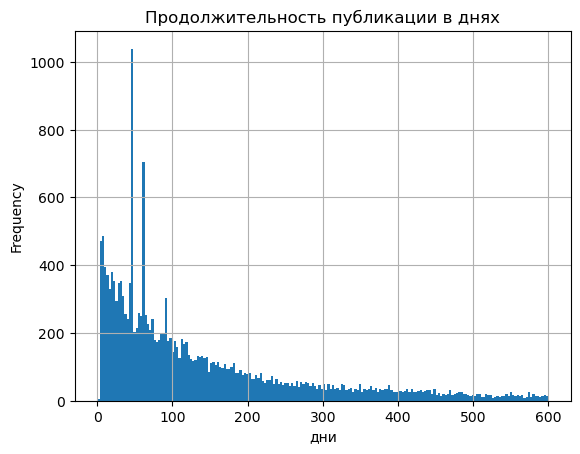

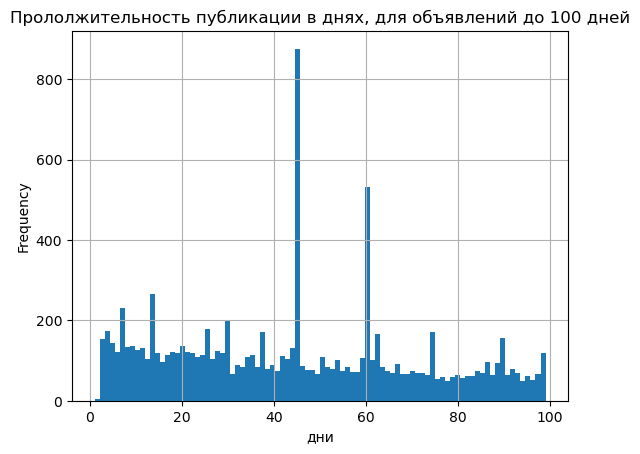

In [72]:

data_clean.query('days_exposition !=0')['days_exposition']\
    .plot(kind='hist',bins=200, range=(0,600), grid=True)
plt.title("Продолжительность публикации в днях") 
plt.xlabel("дни") 
plt.show()
data_clean.query('days_exposition < 100')['days_exposition']\
    .plot(kind='hist',bins=90,  grid=True)
plt.title("Прололжительность публикации в днях, для объявлений до 100 дней") 
plt.xlabel("дни") 
plt.show()

Основная часть квартир продается в срок до 200 дней, далее тренд нисхожящий. При приближении видим 2 пика 45 и 60 дней - это беспланые сроки публикации, после которых объявлениие снимается: \
до 4,5 млн — 45 дней \
от 4,5 до 10 млн — 60 дней \
от 10 млн — 90 дней \
квартир дороже 10 млн не много, так что пик не высокий
Минимальный срок размещения 1 день, максимальный более 4 лет \
Медиана 5 месяцев, в среднем 6 месяцев
Половина квартир продается за 3 месяца

<h2> Какие факторы больше всего влияют на общую (полную) стоимость объекта?

### общая площадь

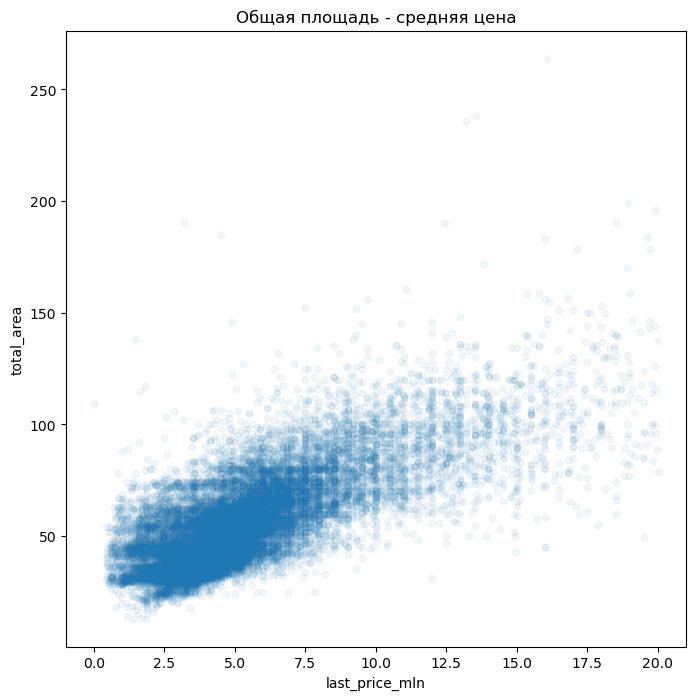

Коэффициент корреляции: 0.750


In [73]:
data_clean.plot(x='last_price_mln', y='total_area', kind='scatter', figsize=(8,8), alpha=0.06)
plt.title("Общая площадь - средняя цена") 
plt.show()             
print('Коэффициент корреляции:', '{:.3f}'.format(data_clean['last_price'].corr(data_clean['total_area'])))

По графику и по коэффициенту корреляции видно что чем больше площадь квартиры тем выше цена.

### жилая площадь

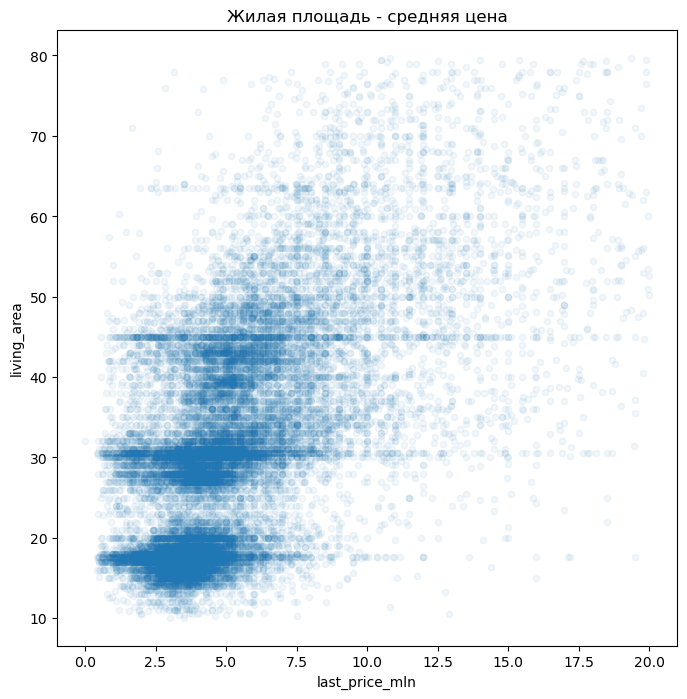

Коэффициент корреляции: 0.595


In [74]:
data_clean.plot(x='last_price_mln', y='living_area', kind='scatter', figsize=(8,8), alpha=0.06)
plt.title("Жилая площадь - средняя цена") 
plt.show()             
print('Коэффициент корреляции:', '{:.3f}'.format(data_clean['last_price'].corr(data_clean['living_area'])))

Жилая площадь так же имеет корреляцию с ценой, однако меньше чем общая. На графике видны концентрации одно, двух и трех комнатных квартир

### площадь кухни

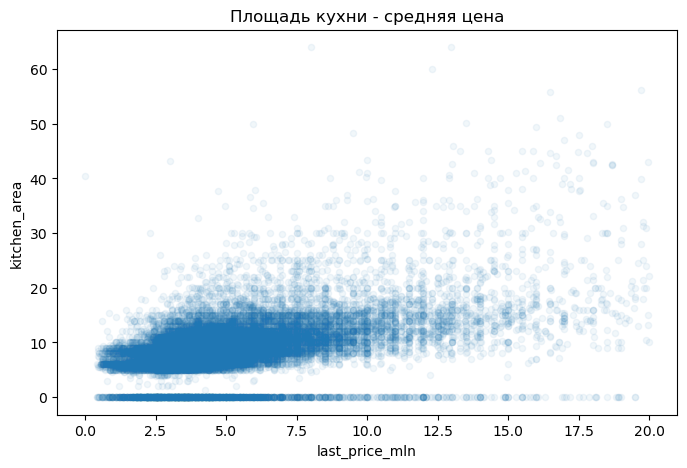

Коэффициент корреляции: 0.480


In [75]:
data_clean.plot(x='last_price_mln', y='kitchen_area', kind='scatter', figsize=(8,5), alpha=0.06)
plt.title("Площадь кухни - средняя цена") 
plt.show()             
print('Коэффициент корреляции:', '{:.3f}'.format(data_clean['last_price'].corr(data_clean['kitchen_area'])))

От площади кухни зависимость сильно меньше, так же видим нижнее скопление точек - это студии или квартиры где площадь кухни не указана. 

### количество комнат
    

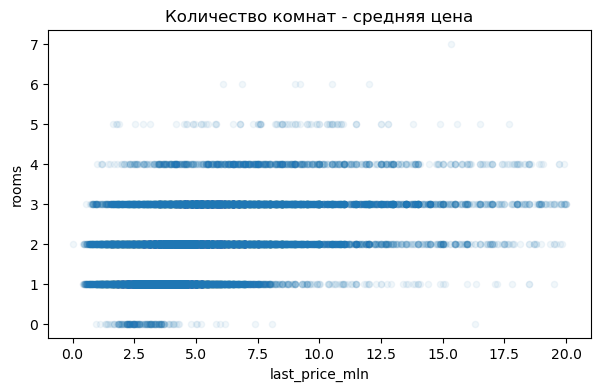

Коэффициент корреляции: 0.451


In [77]:
data_clean.plot(x='last_price_mln', y='rooms', kind='scatter', figsize=(7,4), alpha=0.06)
plt.title("Количество комнат - средняя цена") 
plt.show()  

print('Коэффициент корреляции:', '{:.3f}'.format(data_clean['last_price'].corr(data_clean['rooms'])))

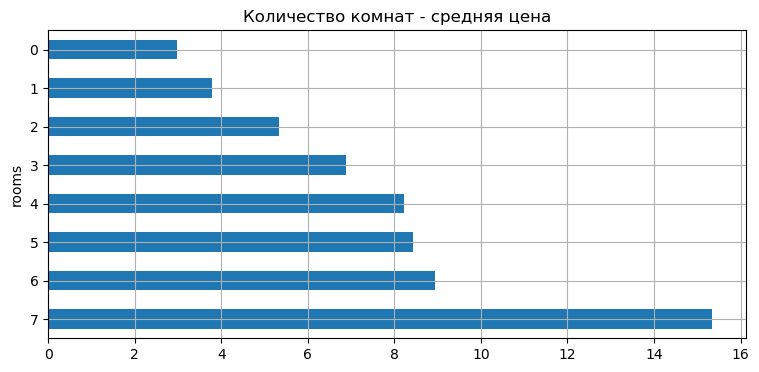

In [78]:
(
    data_clean
    .pivot_table(index = 'rooms', values = 'last_price_mln', aggfunc= 'mean')
    .sort_values(by='last_price_mln', ascending=False)
    .plot(y='last_price_mln', kind='barh', figsize=(9, 4), legend=False, grid=True)
)
plt.title("Количество комнат - средняя цена") 
plt.show()

Существует зависимость от количества комнат, чем их больше тем выше цена

### этаж, на котором расположена квартира (первый, последний, другой)

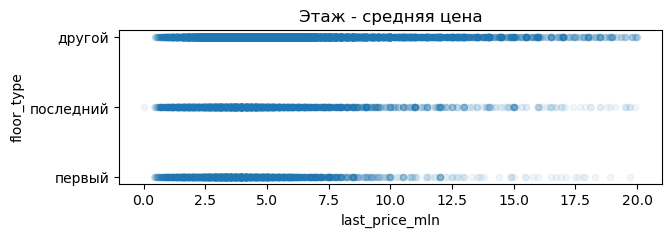

In [79]:
data_clean.plot(x='last_price_mln', y='floor_type', kind='scatter', figsize=(7,2), alpha=0.06)
plt.title("Этаж - средняя цена") 
plt.show()             



Первый этаж самы не популярный и дорогих квартир на нем меньше всего, последний более популярен. Все что не первый и не последний имеент более высокую цену. \
Стоимость зависит от этажа, первые дешевле

### дата размещения (день недели, месяц, год).

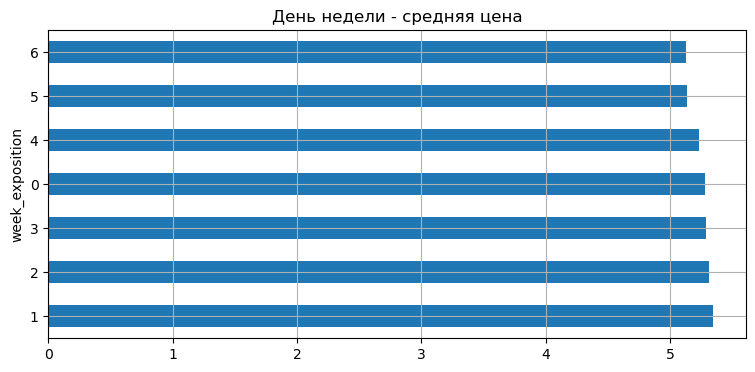

In [80]:
(
    data_clean
    .pivot_table(index = 'week_exposition', values = 'last_price_mln', aggfunc= 'mean')
    .sort_values(by='last_price_mln', ascending=False)
    .plot(y='last_price_mln', kind='barh', figsize=(9, 4), legend=False, grid=True)
)

plt.title("День недели - средняя цена") 
plt.show()

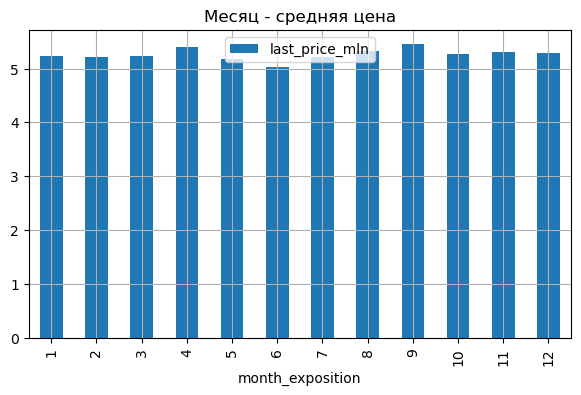

In [47]:
(
    data_clean
    .pivot_table(index = 'month_exposition', values = 'last_price_mln', aggfunc= 'mean')
    .sort_values(by='month_exposition')
    .plot(y='last_price_mln', kind='bar', figsize=(7, 4), title= 'Месяц - средняя цена', grid=True)
)
plt.show()



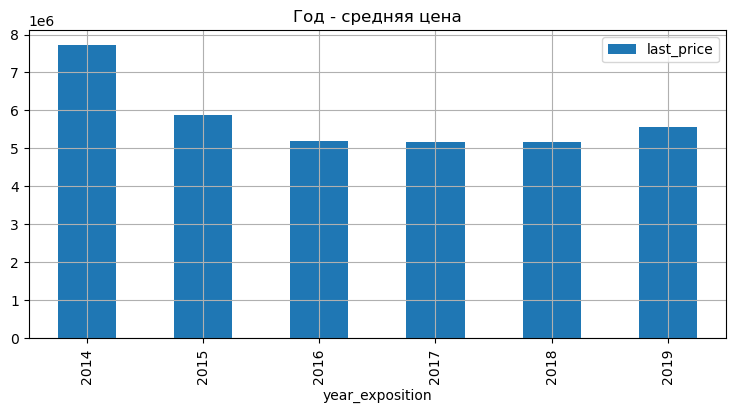

In [48]:
(
    data_clean
    .pivot_table(index = 'year_exposition', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='year_exposition', ascending=True)
    .plot(y='last_price', kind='bar', figsize=(9, 4), title= 'Год - средняя цена', grid=True)
)
plt.show()

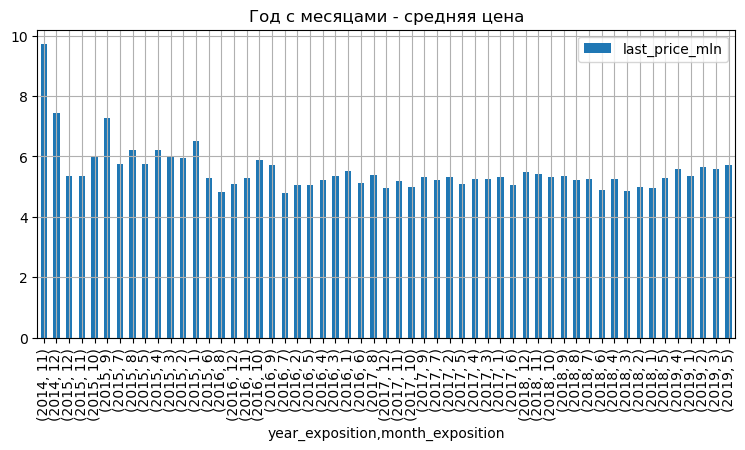

In [49]:

(
     data_clean.pivot_table(index = ['year_exposition','month_exposition'], values = 'last_price_mln', aggfunc= 'mean')
    .sort_values(by='year_exposition', ascending=True)
    .plot(y='last_price_mln', kind='bar', figsize=(9, 4), title= 'Год c месяцами - средняя цена', grid=True)
)
plt.show()

В выхоные дни цены чуть меньше чем в будни, \
Июнь, июль цены чуть меньше чем в остальны месяцы \
По годам - за 2014 данные только за 2 месяца, с 2015 небольшое снижение, в целом зависимость от месца и года не прослеживается 

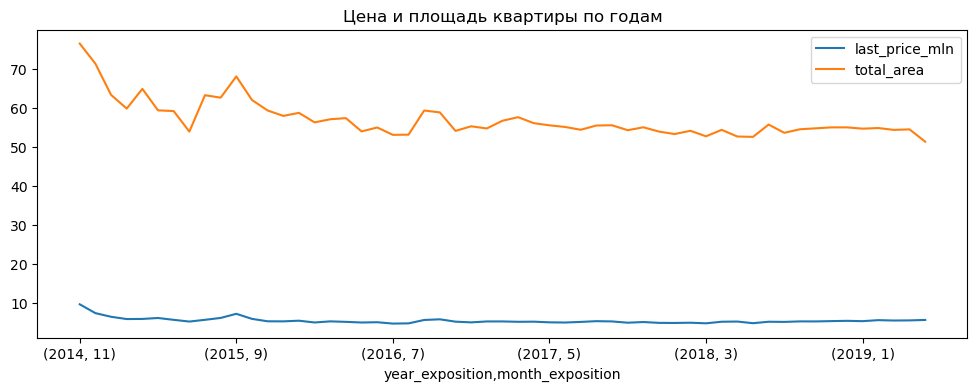

In [83]:
price_or_square = (data_clean
    .pivot_table(index = ['year_exposition','month_exposition'], \
                 values = ['last_price_mln','total_area'], aggfunc= 'mean'))
price_or_square.plot(y=['last_price_mln', 'total_area'], figsize=(12, 4))
plt.title("Цена и площадь квартиры по годам") 
plt.show()

Пики роста цены в 14, 15 и 6 годах болье зависят от средней площади квартиры. Больше площадь - больше цена, вот в 19 площадь чуть уменьшилась а цена пошла вверх. Инфляция видимо

### посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [53]:
top_towns = data_clean.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'median'])
top_towns.columns = ['количество' , 'средняя цена кв метра']
print(top_towns.sort_values(by='количество', ascending=False).head(10))


                   количество  средняя цена кв метра
locality_name                                       
Санкт-Петербург         14544              103658.54
поселок Мурино            548               85878.46
поселок Шушары            436               76876.17
Всеволожск                396               65789.47
Пушкин                    353               99542.33
Колпино                   336               74723.75
поселок Парголово         326               91780.22
Гатчина                   306               67860.57
деревня Кудрово           298               91831.87
Выборг                    230               58133.21


Населеннй пункт с самой высокой стоимостью кв метра - Санкт Петербург - 103658.54 \
С самой низкой Выборг - 58133.21

 <b> квартиры в Санкт-Петербурге - средняя цена каждого километра.

In [85]:
data_clean['cityCenters_nearest_km'] = (data_clean['cityCenters_nearest']/1000).round(0).astype(int)

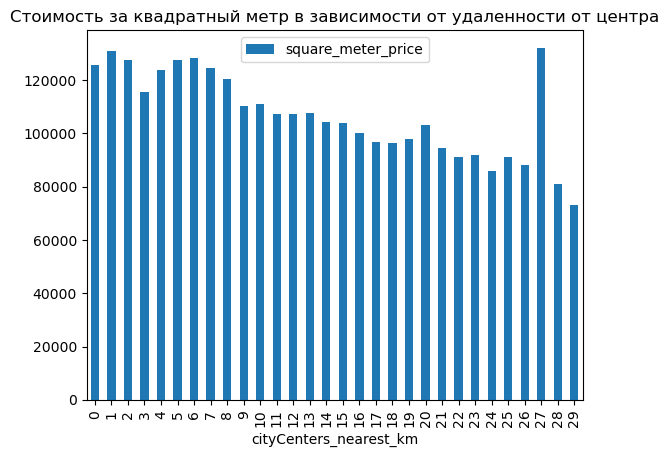

In [89]:

spb_km = (
    data_clean.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc='mean').reset_index()
    
)
spb_km.plot(x='cityCenters_nearest_km', y='square_meter_price', \
            kind='bar', title = 'Стоимость за квадратный метр в зависимости от удаленности от центра')
plt.show()

In [90]:

spb_km.describe()

,cityCenters_nearest_km,square_meter_price
count,30.00,30.00
mean,14.50,106615.00
std,8.80,16190.97
min,0.00,72953.37
25%,7.25,94955.95
50%,14.50,105613.57
75%,21.75,122933.68
max,29.00,132115.71


In [55]:
data_clean.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,year_exposition,month_exposition,week_exposition,square_meter_price,floor_type,cityCenters_nearest_km
5961,6,2250000.00,32.00,2018-02-27,1,2.65,2,16.50,2,False,False,False,7.00,0,Санкт-Петербург,24006.00,27431.00,0.00,0.00,0.00,0.00,178.00,2.25,2018,2,1,70312.50,последний,27
748,13,14350000.00,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.00,27313.00,1.00,1496.00,0.00,0.00,128.00,14.35,2017,11,1,193918.92,другой,27


Удаленность от центра на пряму влияет на цену. Средняя цена в 106622.19. От 8 км идет снижение. \
На 27 ки выброс дала 1 квартира за 14 млн, не будем брать ее в расчет. \
Питер с севера на юг по ЦКАДу всего 30 км и центр примерно 0-8 км, что видно на графике и корелирует с ценой

## Общий вывод

По итогу исследования удалось выяснить факторые больше всего влияющие на стоимость жилья: \
 -Количество комнат - чем больше комнат, тем выше стоимость жилья \
 -Общая площадь квартиры - чем больше площадь, тем выше стоимость жилья \
 -Этаж квартиры - на первом этаже самые дешевые квартиры, наиболее дорогие квартиры -те, что выше первого и ниже последнего этажа, но последний этаж дороже первого

Так же были рассчианы следующие параметры:
- Средняя стоимость жилья составляет 5.27 млн. рублей
- Средняя жилая составляет 31 м²
- Средняя общая составляет 56,6 м²
- Больше всего квартир продается на 2м этаже
- 1-5 этаж самые часто встречающиеся объявления - видимо 5 этажки самые распространенные в выборке
- 1 и 2 комтантые квартиры самые популярные

По срокам продажи - те что продавались до 100 дней - встречались чаще и значит имели большие шансы. После 100 дней чем дольше висит объявление тем меньше шансов на продажу